<font size = "5"> **[Diffraction Tools](../1_Diffraction_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


#  Analyzing Spot Diffraction Pattern


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Diffraction/D2_Diffraction_Spots.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks//Diffraction/D2_Diffraction_Spots.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into **diffraction_tools** and how to use the functions in this package to 
index spot diffraction pattern of **single crystal** sample areas.

The scope of this notebook includes calculation and plotting of 
- allowed, forbidden and dynamically activated Bragg reflections,
- Kikuchi- and HOLZ-lines.

The diffraction vectors are given in polar coordinates and internally in Å or 1/Å because that is the base unit of the ase (atomic simulation evironment) package. The package ase is the crystallography package used in pyTEMlib and allows easy conversion to MD and DFT calculations as well as abTEM image and diffraction simulations. Please note that we often plot in the for microscopy more convenient units of nm and 1/nm.


An explanation on the physcial background can be found in the *[Diffraction](https://gduscher.github.io/MSE672-Introduction-to-TEM/diffraction/ch2-00-diffraction/)* chapter of MSE672-Introduction to TEM


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.



## Load relevant python packages
### Check Installed Packages

In [73]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install numpy==1.24.4
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

we will use pyTEMlib - especially:
* diffraction_tools library.



In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

# Import libraries from the pyTEMlib
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../')
import pyTEMlib

__notebook_version__ = '2025.12.12'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

pyTEM version:  0.2026.1.2
notebook version:  2025.12.12



## Define Crystal

Define a Crystal as an ase object.
 
That allows for easy access to things like reciprocal unit cells (*atoms.cell.reciprocal()*)

With the provided crystal tools it is straight forward to change to 'Gold', 'graphite', 'Pt', or any other supported crystals. Adding structruees with POSCAR or cif files is also supported.

In [2]:
#Initialize the dictionary with all the input
atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
print(atoms)
import ase.visualize
ase.visualize.view(atoms*2, viewer='x3d')


Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])


## Plot Diffraction Pattern
For a minimum we need the zone_axis in Miller indices and the acceleration voltage fo the TEM.
We pack those information in a dictionary and run *get_bragg_reflections* from *diffraction_tools*

> Note:
>
> We calculate the Bragg reflections in polar coordinates.

Of the 2076 possible reflection 404 are allowed.
make_kikuchi
Of those, there are 56 in ZOLZ  and 348 in HOLZ
Of the 98 forbidden reflection in ZOLZ  20 can be dynamically activated.


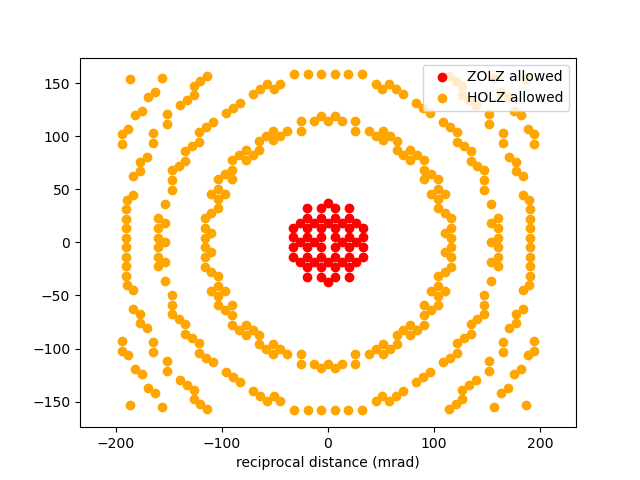

In [5]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
hkl_max = 35  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'mistilt_alpha': np.radians(0),
        'acceleration_voltage':  acceleration_voltage}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

# Simple Plot
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*1000
y = r * np.sin(phi+rotation)*1000


plt.figure()
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')
plt.axis('equal')
plt.xlabel('reciprocal distance (mrad)');
plt.legend();

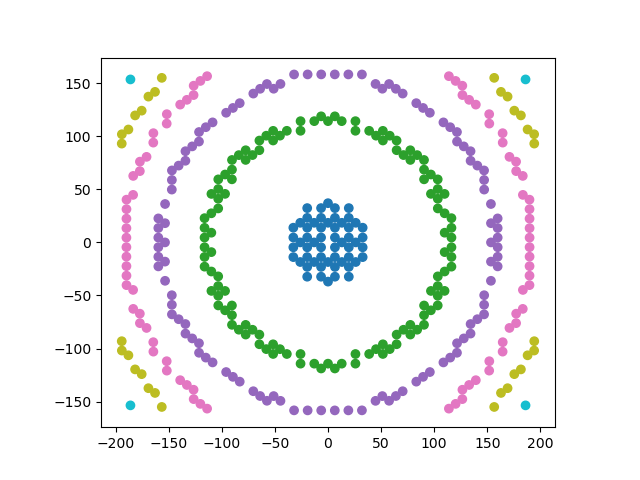

In [16]:
#####################
# Plot ZOLZ SAED Pattern #
#####################

spots = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'])

plt.figure()
plt.scatter(spots[:,0], spots[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'])
plt.gca().set_aspect('equal')

### Allowed, Forbidden and Dynamically-Activated Reflections

We can now plot allowed forbidden and dynamically activated reflections independently.

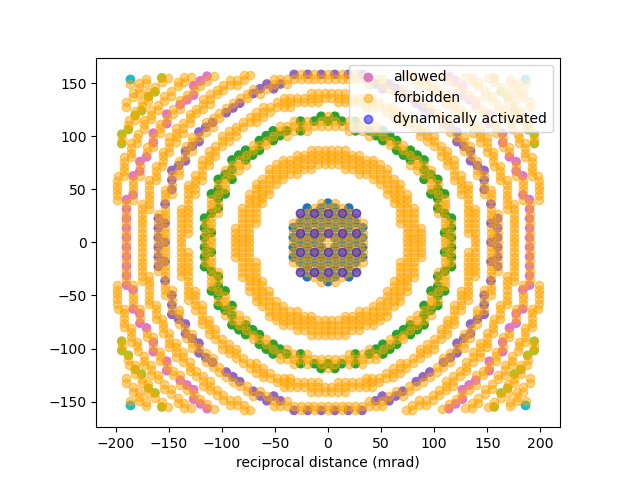

In [45]:
# ---- Input -----
rotation = np.radians(0)
# ----------------

spots_alowed = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'], rotation=rotation)
spots_forbidden = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['forbidden']['g'], rotation=rotation)
spots_activated = (spots_forbidden[diff_dict['forbidden']['ZOLZ']])[diff_dict['forbidden']['dynamically_activated']]
plt.figure()
plt.scatter(spots_alowed[:,0], spots_alowed[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'], label='allowed')
plt.scatter(spots_forbidden[:,0], spots_forbidden[:, 1], c='orange', alpha=0.5, label='forbidden')
plt.scatter(spots_activated[:,0], spots_activated[:, 1], c='blue', alpha=0.5, label='dynamically activated')

plt.gca().set_aspect('equal')

activated = (diff_dict['forbidden']['dynamically_activated'])

plt.xlabel('reciprocal distance (mrad)')
plt.legend();

### Plotting in Polar Coordinates

Like for ring-diffraction pattern, it is illustrative to look at the diffraction pattern in polar coordinates.

You will notece that we internally use only polar cooredinates.

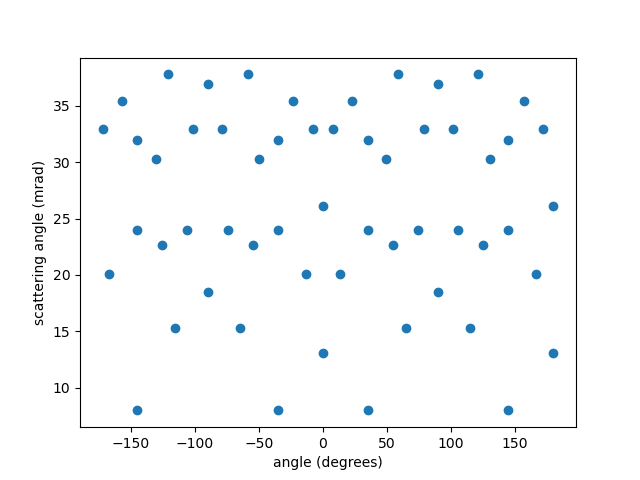

In [47]:
# ---- Input -----
rotation = np.radians(-10)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

plt.figure()
plt.scatter( np.degrees(phi)[ZOLZ], r[ZOLZ]*1000)
plt.xlabel('angle (degrees)');
plt.ylabel('scattering angle (mrad)');



### All with pyTEMlib and Mistilt


mistilt
Of the 334 possible reflection 56 are allowed.
Of those, there are 17 in ZOLZ  and 39 in HOLZ
Of the 130 forbidden reflection in ZOLZ  0 can be dynamically activated.


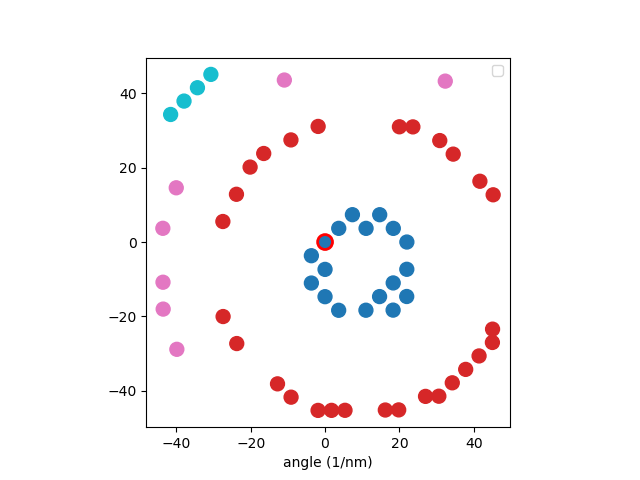

In [85]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 0, 0])
hkl_max = 25  #  maximum allowed Miller index
sg_max = 0.01   # 1/Ang  maximum allowed excitation error
mistilt_alpha = 1.5   # degrees
mistilt_beta = 1 # degrees
acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'mistilt_alpha': np.radians(mistilt_alpha),
        'mistilt_beta': np.radians(mistilt_beta),
        'acceleration_voltage':  acceleration_voltage}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
diff_dict.setdefault('output',{})['plot_forbidden']=False
diff_dict['output']['plot_dynamically_allowed']=True

v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, unit='1/nm')


### Plot Kikuchi Pattern
With the knowledge that the slope $m = \tan(\phi)$
we can plot the  perpendicular bisector of the line from origin to the Bragg peaks which are the Kikuchi lines.

Text(0.5, 0, 'reciprocal distance (1/nm)')

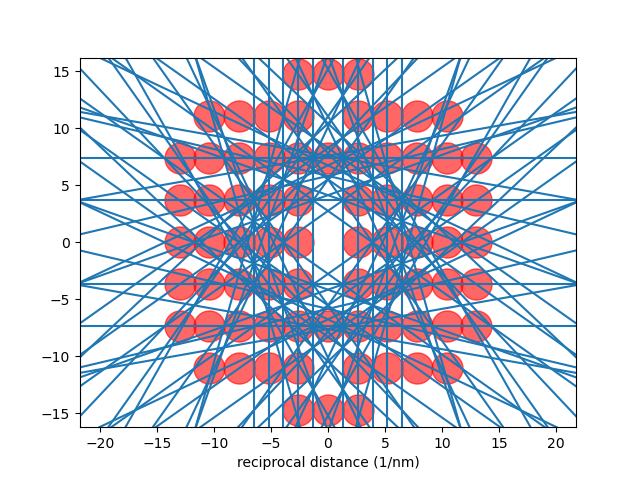

In [9]:
# ---- Input -----
rotation = np.radians(0)
size = 500 # mrad
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']

r = diff_dict['allowed']['g'][ZOLZ, 0] * 10  # now in 1/nm
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r * np.cos(phi+rotation)
y = r * np.sin(phi+rotation)
plt.figure()
plt.scatter(x,y, s=size, alpha = .6, c= 'r')
for i, ph in enumerate(phi-np.pi/2): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph)))
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

Or with the help of a function and the HOLZ line equation for d_theta ($\Delta \theta$) in the zero order Laue zone (ZOLZ)

d_theta in units of length is stored in the 4th dimension of the g vector for convenience.

In [10]:
def plotting_coordinates(g, rotation=0, feature='spot'):
    if feature == 'line':
        # Note: d_theta in g{: 3] is negative so we need to rotate phi by 180 degree
        x = g[:, 3] * np.cos(g[:, 1]+np.pi+rotation)*10
        y = g[:, 3] * np.sin(g[:, 1]+np.pi+rotation)*10
        return np.stack((x, y, np.tan(g[:, 1]+rotation-np.pi/2)), axis= 1)

    x = g[:, 0] * np.cos(g[:, 1]+rotation)*10
    y = g[:, 0] * np.sin(g[:, 1]+rotation)*10
    return np.stack((x, y), axis= 1) 

In [11]:
def plotting_coordinates(g, rotation=0, laue_circle=[0,0], feature='spot'):
    if feature == 'HOLZ':
        # Note: d_theta in g{: 3] is negative so we need to rotate phi by 180 degree
        x = g[:, 3] * np.cos(g[:, 1]+np.pi+rotation)*10
        y = g[:, 3] * np.sin(g[:, 1]+np.pi+rotation)*10
        return np.stack((x, y, np.tan(g[:, 1]+rotation-np.pi/2)), axis= 1)
    elif feature == 'Kikuchi':
        # Note: d_theta in g{: 3] is negative so we need to rotate phi by 180 degree
        x = (g[:, 0] * np.cos(g[:, 1]+np.pi+rotation)*10)/2+laue_circle[0]
        y = g[:, 0] * np.sin(g[:, 1]+np.pi+rotation)*10/2+laue_circle[1]
        return np.stack((x, y, np.tan(g[:, 1]+rotation-np.pi/2)), axis= 1)

    x = g[:, 0] * np.cos(g[:, 1]+rotation)*10
    y = g[:, 0] * np.sin(g[:, 1]+rotation)*10
    return np.stack((x, y), axis= 1) 

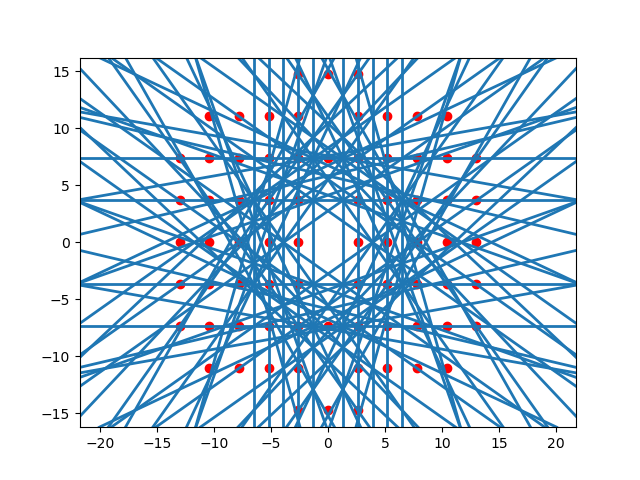

In [12]:
rotation = 0

ZOLZ = diff_dict['allowed']['ZOLZ']

xy = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'][ZOLZ],
                                                     rotation=rotation,
                                                     feature='spot')
kikuchi = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['Kikuchi']['g'],
                                                     rotation=rotation,
                                                     laue_circle=diff_dict['Laue_circle'],
                                                     feature='Kikuchi')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
for line in kikuchi:
    plt.axline( (line[0], line[1]),slope=line[2], linewidth = 2)

plt.axis('equal');

## Plot HOLZ Lines

Because, we calculated the $d\theta$ for all reflections, we do not need to do anything else for HOLZ lines

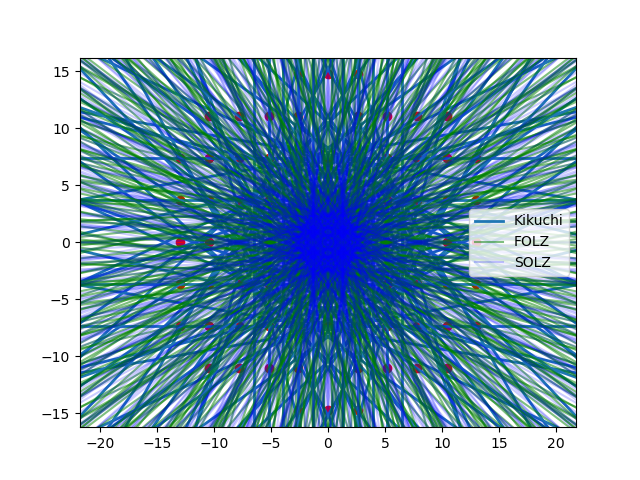

In [13]:
ZOLZ = diff_dict['allowed']['ZOLZ']
FOLZ = diff_dict['allowed']['FOLZ']
SOLZ = diff_dict['allowed']['SOLZ']
xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='HOLZ')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
line = (kikuchi[ZOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], linewidth=2, label='Kikuchi')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], linewidth=2)
line = (kikuchi[FOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.5, label='FOLZ')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)

line = (kikuchi[SOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
for line in kikuchi[SOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)
plt.axis('equal')
plt.legend();

### HOLZ lines in Higher Order Zone Axis

Of the 105 possible reflection 105 are allowed.
Of those, there are 50 in ZOLZ  and 55 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.


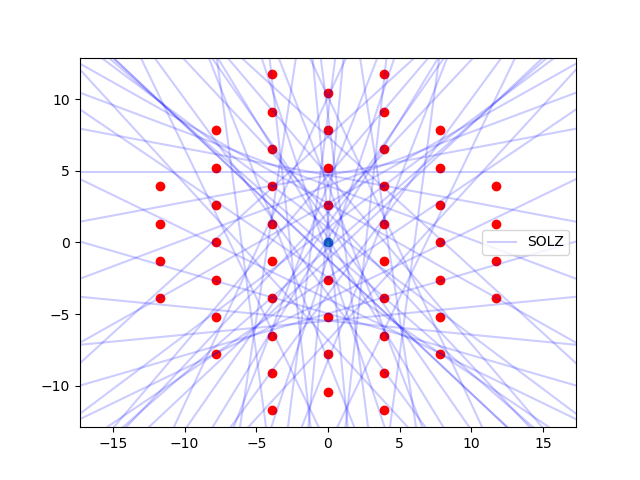

In [36]:
tags = {'acceleration_voltage': 99.2 * 1000.0,  # V
      'convergence_angle': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 7}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 


ZOLZ = diff_dict['allowed']['ZOLZ']
FOLZ = diff_dict['allowed']['FOLZ']
SOLZ = diff_dict['allowed']['FOLZ']
HOLZ = diff_dict['allowed']['FOLZ']

xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], rotation=np.pi/2, feature='HOLZ')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
#line = (kikuchi[ZOLZ])[0]
#plt.axline( (line[0], line[1]), slope=line[2], linewidth=2, label='Kikuchi')
#for line in kikuchi[ZOLZ]:
#    plt.axline( (line[0], line[1]), slope=line[2], linewidth=2)
#line = (kikuchi[FOLZ])[0]
#plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.5, label='FOLZ')
#for line in kikuchi[FOLZ]:
#    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)
if SOLZ.sum()>0:
    line = (kikuchi[SOLZ])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
    for line in kikuchi[SOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)
plt.axis('equal')
plt.scatter(0,0)
plt.legend();

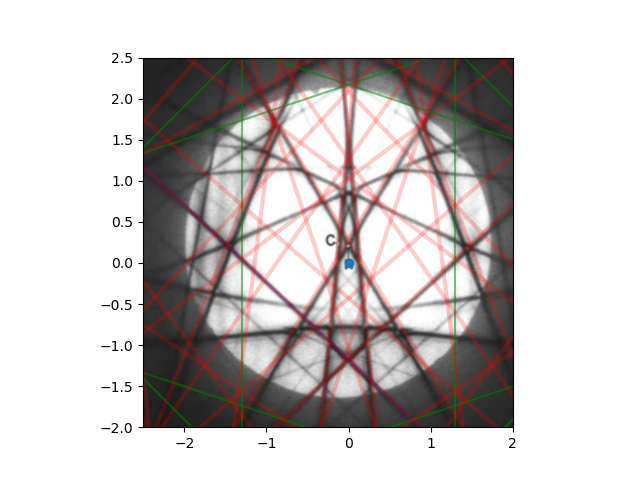

In [37]:
image = plt.imread('./Zuo-HOLZ-experiment.jpg')
plt.figure()
extent = np.array([-2.7006,  2.8206, -2.15  ,  3.01  ])
extent[:2] -= 0.125
extent[2:] -= 0.06

extent /=1.03
plt.imshow(image, extent=extent)
plt.axis('auto')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)
if SOLZ.sum()>0:
    line = (kikuchi[HOLZ])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ', linewidth=2)
    for line in kikuchi[SOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha = 0.2, linewidth=3)

plt.scatter(0,0)
plt.xlim(-2.5,2)
plt.ylim(-2,2.5)
plt.gca().set_aspect('equal')
extent;

In [40]:

np.sum(diff_dict['allowed']['hkl'] * tags['zone_hkl'], axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

Or with a few more lines (higher hkl_max)

Of the 105 possible reflection 105 are allowed.
Of those, there are 50 in ZOLZ  and 55 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.


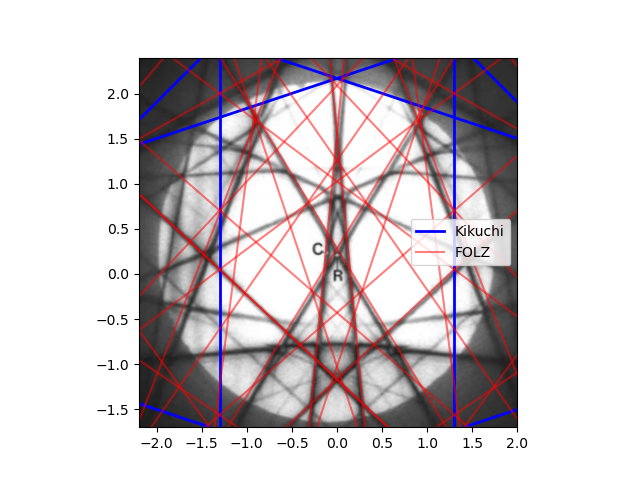

In [62]:
tags = {'acceleration_voltage': 99.2 * 1000.0,  # V
      'convergence_angle': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 7}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

zolz = diff_dict['allowed']['ZOLZ']
folz = diff_dict['allowed']['FOLZ']
solz = diff_dict['allowed']['SOLZ']
hholz = diff_dict['allowed']['HOLZ_plus']
rotation = np.pi/2
xy = plotting_coordinates(diff_dict['allowed']['g'][zolz], rotation=rotation, feature='spot')
holz = plotting_coordinates(diff_dict['allowed']['g'], rotation=rotation, feature='HOLZ')
kikuchi = plotting_coordinates(diff_dict['Kikuchi']['g'], rotation=rotation, feature='Kikuchi')
plt.close('all')
plt.figure()
extent = np.array([-2.7006,  2.8206, -2.15  ,  3.01  ])
extent[:2] -= 0.125
extent[2:] -= 0.06
extent /=1.03
plt.imshow(image, extent=extent)
plt.axis('auto')
line = kikuchi[0]
plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=1, linewidth =2, label='Kikuchi')
for line in kikuchi:
    plt.axline( (line[0], line[1]),slope=line[2], color='b', alpha=1, linewidth =2)
if folz.sum()  >0:
    line = (holz[folz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha=0.5, label='FOLZ')
    for line in holz[folz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha = 0.5)    
if solz.sum()>0:
    line = (holz[solz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.5, label='SOLZ')
    for line in holz[solz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.5)
if hholz.sum()>0:
    line = (holz[hholz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.2, label='HHOLZ')
    for line in holz[hholz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha = 0.2)

plt.legend()
plt.gca().set_aspect('equal')
plt.xlim(-2.2,2)
plt.ylim(-1.7,2.4);

## Calculation and Plotting with pyTEMlib
The parameters controlling the plotting output are defined in the 'output' subdictionory.

Default values are applied.

Of the 290 possible reflection 290 are allowed.
Of those, there are 24 in ZOLZ  and 266 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.
kikuchi


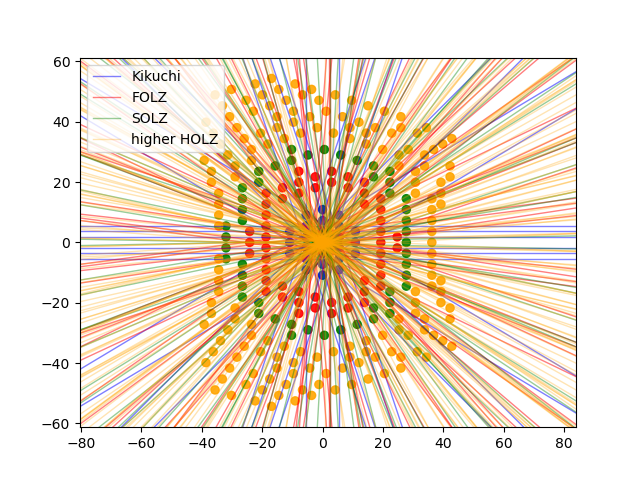

In [265]:


tags = {'acceleration_voltage': 99.2 * 1000.0,  # V
      'convergence_angle': 5.,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 15}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
diff_dict['output'] = {}
diff_dict['output']['plot_HOLZ'] = True
diff_dict['output']['plot_Kikuchi'] = True
fig = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, diffraction_pattern=None)

## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

The diffraction pattern is a projection onto the plane perpendicular to the zone axis. For an easy projection we tilt everything so that the x,y plane  is our projection plane.

Determination of Bragg reflections in polar coordinates allows for easy rotation in plane and calculation of Kikuchi and HOLZ lines.


In [142]:
plt.close('all')

mistilt
Of the 19 possible reflection 17 are allowed.
Of those, there are 17 in ZOLZ  and 0 in HOLZ
Of the 2 forbidden reflection in ZOLZ  2 can be dynamically activated.
kikuchi


(np.float64(-7.653275148193381),
 np.float64(7.653275148193381),
 np.float64(-7.479966640544674),
 np.float64(4.512540296105291))

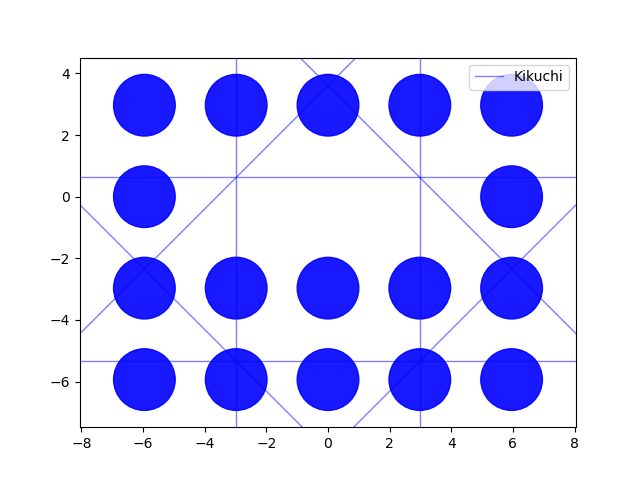

In [141]:

# -----Input ----------
mistilt_alpha  = -.0  # in degree
mistilt_beta = 5   # in degree
S_g = .05 # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
# ---------------------


atoms = pyTEMlib.crystal_tools.structure_by_name('FCC Fe')

# add necessary parameters for kinematic scattering calculation
tags = {'acceleration_voltage_V': 100000,
        'convergence_angle_mrad': 0,
        'zone_hkl': [0, 0, 1], # incident neares zone axis: defines Laue Zones!!!!
        'mistilt_alpha':  np.radians(mistilt_alpha),  # mistilt in degrees
        'mistilt_beta': np.radians(mistilt_beta),
        'Sg_max': S_g, # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
        'hkl_max': 2   # Highest evaluated Miller indices
       }
# calulcuate kinematic scattering data

 
tags['crystal_name'] = f"FCC with mistilt {tags['mistilt_alpha']}"
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
diff_dict['output'] = {} #pyTEMlib.diffraction_tools.plot_saed_parameter()
diff_dict['output']['plot_labels'] = False
diff_dict['output']['plot_Kikuchi'] = True

diff_dict['allowed']['g']
v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)
plt.axis('equal')

In [124]:
diff_dict.keys()

dict_keys(['allowed', 'forbidden', 'K_0', 'HOLZ', 'output', 'thickness', 'experimental'])

mistilt
Of the 134 possible reflection 134 are allowed.
Of those, there are 130 in ZOLZ  and 4 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.
thickness 100


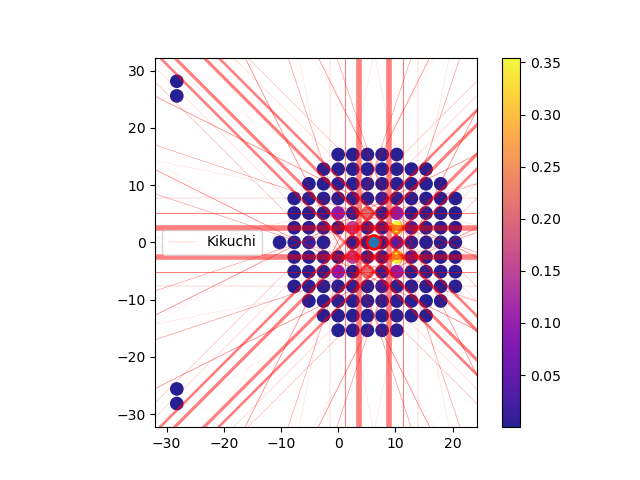

In [106]:
# -------Input ------ # 
crystal_name = 'SrTiO3'
zone_axis = [0, 0, 1]
mistilt_alpha = .9  # in degree
mistilt_beta = 0
# ------------------- #


# Crystal unit cell defintion 
atoms = pyTEMlib.crystal_tools.structure_by_name(crystal_name)

tags = {'crystal_name': crystal_name,
        'acceleration_voltage': 200.0 *1000.0, #V
        'convergence_angle': 3.,
        'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
        'thickness': 200,  # in Ang
        'hkl_max': 11,   # Highest evaluated Miller indices
        'zone_hkl': np.array(zone_axis),  
        'mistilt_alpha': np.radians(mistilt_alpha),  
        'mistilt_beta': np.radians(mistilt_beta),
        'plot_FOV': 2}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
        
diff_dict['output'] = pyTEMlib.diffraction_tools.plot_saed_parameter()
diff_dict['output']['thickness'] = 100
diff_dict['thickness'] = 100
diff_dict['output'].update({'plot Kikuchi': True,})

############
## OUTPUT
############

v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)
#plt.gca().set_xlim(-2, 2)
#plt.gca().set_ylim(-2, 2)
plt.colorbar()

Of the 156 possible reflection 156 are allowed.
Of those, there are 50 in ZOLZ  and 106 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.


(-2.0, 2.0)

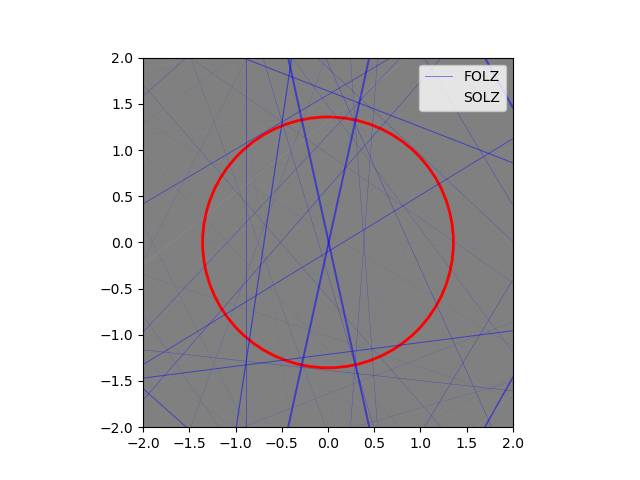

In [269]:
# ----- Input -----------
unit_cell_change_pm = -1.0
# -----------------------

atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
cell = atoms.cell.lengths()
atoms.set_cell(cell+unit_cell_change_pm/100, scale_atoms=True)
atoms

tags = {'crystal_name': 'silicon',
        'acceleration_voltage': 100.8*1000.0, #V
        'convergence_angle': 5.,
        'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
        'hkl_max': 9,   # Highest evaluated Miller indices
        'zone_hkl': np.array([1, 2, -2]),  
        'mistilt_alpha degree': 0.,  # -45#-35-0.28-1+2.42
        'mistilt_beta degree': 0.,
        'plot_FOV': .5}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

diff_dict['output']=pyTEMlib.diffraction_tools.plot_holz_parameter()
diff_dict['output']['plot_reflections']=False
diff_dict['output']['plot_Kikuchi']=False
diff_dict['output']['linewidth_HOLZ'] = -1
diff_dict['output']['plot_HOLZ']=True


pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)


plt.gca().set_xlim(-2,2)
plt.gca().set_ylim(-2,2)

Of the 134 possible reflection 114 are allowed.
Of those, there are 18 in ZOLZ  and 96 in HOLZ
Of the 0 forbidden reflection in ZOLZ  0 can be dynamically activated.


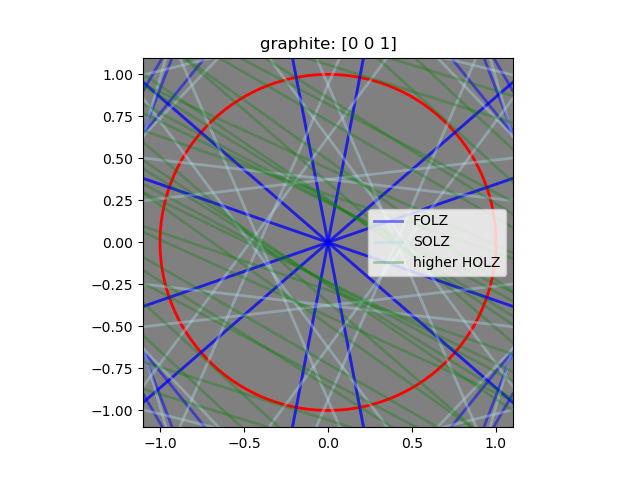

In [78]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO

# ----- Input -----------
crystal_name = 'graphite'
acceleration_voltage =  60.49 * 1000.0
# -----------------------

atoms = pyTEMlib.crystal_tools.structure_by_name(crystal_name)

tags = {'crystal_name': crystal_name,
        'acceleration_voltage': acceleration_voltage, #V
        'convergence_angle_mrad': 7.,
        'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
        'hkl_max': 9,   # Highest evaluated Miller indices
        'zone_hkl': np.array([0, 0, 1]),  
        'mistilt_alpha': .0,  # -45#-35-0.28-1+2.42
        'mistilt_beta': 0.,
        'thickness': 100,
        'plot_FOV': .5}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

diff_dict['output']=pyTEMlib.diffraction_tools.plot_holz_parameter()
diff_dict['output']['plot_reflections']=True
diff_dict['output']['plot_Kikuchi']=False
diff_dict['output']['linewidth_HOLZ'] = 2
diff_dict['output']['plot_HOLZ']=True

pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict)

plt.title(crystal_name + ': ' + str(tags['zone_hkl']))
plt.gca().set_xlim(-1.1, 1.1)
plt.gca().set_ylim(-1.1, 1.1)

plt.gca().set_aspect('equal')